# Drawing with LLMs Starter Notebook

In this competition, we are asked to build a model which takes a string prompt and returns valid [SVG](https://en.wikipedia.org/wiki/SVG) code producing an image matching the prompt.

This Notebook goes into more detail about Kaggle Packages, but only provides a simple model which is ready for submission. Also check out Ryan's [more advanced starter notebook](https://www.kaggle.com/code/ryanholbrook/drawing-with-llms-getting-started-with-gemma-2) which uses the Gemma 2 model to get better outputs, but assumes some knowledge of Kaggle Packages.

You can `Copy & Edit` this Notebook, `Save Version`, then `Submit` from the saved version's `Output` tab.

# Introducing Kaggle Packages

We're launching new functionality that lets you write Python Packages which can be imported and re-used elsewhere. This Notebook will discuss some details, but check out our full [Kaggle Packages documentation](https://www.kaggle.com/docs/packages) for more information.

We use the open-source [`nbdev` library](https://nbdev.fast.ai) which lets you define a Python Package within a Jupyter Notebook. When you `Save Version`, we'll run your whole Notebook as usual, then *also* export all cells with `nbdev`'s special `#| export` tag to a Python Package.  You can navigate to this Notebook's `Output` tab to see the Package it exported!

In this competition, you'll write a Package which defines a `class Model` with a `def predict(inputs)` function which returns your predictions. Unlike most Kaggle Code Competitions, you no longer have to manually read the test set, run your inference loop, and write a submission file.  Kaggle Packages expand on some "API-based" Code Competitions we've run recently which experimented with similar improvements, and are also an extension of our older Utility Script functionality.
1. When you submit to the competition, our internal scoring system will install your Package and run inference over the hidden test set using your `Model`.
2. You can use `kagglehub` to install Packages (your own, or any public Packages) elsewhere (on Kaggle, Colab, your machine, etc) and run inference on arbitrary inputs or hook them into an ML pipeline, etc.
3. In the future, we may utilize more `nbdev` features like automated documentation.

## Writing a Package Notebook with `nbdev`

With `nbdev`, you write your **Notebook** (you are here) which will run when you `Save Version` as usual, but then *also* exports a subset of its code into the Notebook's Output as a **Python Package**, which can later be imported elsewhere.

For example, your Notebook could train a model (code not exported) and export its weights, then **export** your `Model` code which loads those model weights and implements inference in a `predict` function, then run some tests on your `Model` (code not exported) to make sure it works before saving.

`nbdev` usage:
1. You must have a code cell with `#| default_exp core` which tells `nbdev` to export a Package from this Notebook and write to `core.py`.
2. You must **explicitly tag cells** with `#| export` syntax to export them. Cells without that tag are *not* exported.

You must make sure that your Package can run on its own and is not reliant on non-exported code, and also follows the competition's expected format (discussed below).  When you `Save Version`, we perform a **Validation Run** on your exported Package which looks for common errors and flags them for you.

In [2]:
#| default_exp core

The above cell is **required** to produce a Package, it tells `nbdev` to export a Package from this Notebook and write to `core.py`.  Your Package will automatically `import core` when it gets `import`ed.  You don't have to use the name `core`, that is just the standard.

In [6]:
ls /kaggle/input/drawing-with-llms/published

kaggle_evaluation/  questions.parquet  train.csv


In [8]:
# We can load and explore the competition's train set to get a feel for the data.
# We're not going to export this cell as it's not needed for our exported inferenceable model.

import kagglehub
import polars as pl

# train_path = kagglehub.competition_download('drawing-with-llms', 'train.csv')
train_path = '/kaggle/input/drawing-with-llms/published/train.csv'
train = pl.read_csv(train_path)

train.head()

id,description
str,str
"""02d892""","""a purple forest at dusk"""
"""0dcd2e""","""gray wool coat with a faux fur…"
"""1e9ac1""","""a lighthouse overlooking the o…"
"""2b25db""","""burgundy corduroy pants with p…"
"""4e6a54""","""orange corduroy overalls"""


# Competition Requirement:  Exported Package with Model class

Each competition utilizing Packages will require your Package to conform to a competition-specific format.  Generally you must have a `class Model` with a `predict(...)` function, and each competition will have different expectations for the inputs and outputs of `predict`, which will be made clear in competition documentation and Starter Notebooks like this one.

In this competition, `predict` takes argument `prompt` of type string and returns a string of valid SVG code.  The competition restricts the space of valid SVG code, see the SVG constraints [here](https://www.kaggle.com/code/metric/svg-constraints).

In [9]:
#| export

# NOTE the special `#| export` tag above which means all code in this cell will be exported to your Package.
# Make sure to `import` any python packages required by your Model, either here or in other exported cells.

class Model:
    def __init__(self):
        '''Optional constructor, performs any setup logic, model instantiation, etc.'''
        pass
      
    def predict(self, prompt: str) -> str:
        '''Generates SVG which produces an image described by the prompt.

        Args:
            prompt (str): A prompt describing an image
        Returns:
            String of valid SVG code.
        '''
        # Renders a simple circle regardless of input
        return '<svg width="100" height="100" viewBox="0 0 100 100"><circle cx="50" cy="50" r="40" fill="red" /></svg>'

Notice how we put `#| export` so this cell will be included in our exported Package.

## Optional model validation

Now let's **test** our model to make sure it works and conforms to the competition's expected format.

<svg width="100" height="100" viewBox="0 0 100 100"><circle cx="50" cy="50" r="40" fill="red" /></svg>


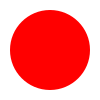

In [10]:
# We can play with our Model and render its SVG output (don't export!)

from IPython.display import SVG

model = Model()
svg = model.predict('a goose winning a gold medal')

print(svg)
display(SVG(svg))

In [14]:
cd /kaggle/input/drawing-with-llms/published/

/kaggle/input/drawing-with-llms/published


In [15]:
!pwd

/kaggle/input/drawing-with-llms/published


In [16]:
ls

kaggle_evaluation/  questions.parquet  train.csv


In [17]:
# The competition also provides a function to validate that your Model
# loads successfully and meets the competition's expected format.

# This is the competition's helper module
import kaggle_evaluation

kaggle_evaluation.test(Model)

Creating Model instance...
Running inference tests...
GETPREDICT: 98051e - ginger ribbed dungarees
GOTPREDICT: 98051e
GETPREDICT: 279f7b - scarlet squares in a disordered array
GOTPREDICT: 279f7b
GETPREDICT: c828f0 - indigo prisms circling a copper spire
GOTPREDICT: c828f0
GETPREDICT: 8021f8 - an aubergine satin neckerchief with fringed edges
GOTPREDICT: 8021f8
GETPREDICT: 91f5df - a wine-colored 12-sided shape connected by turquoise strands
GOTPREDICT: 91f5df
GETPREDICT: c73bb3 - tan polygons and sky-blue arcs
GOTPREDICT: c73bb3
GETPREDICT: 4d552b - charcoal cashmere overcoat with a synthetic fur lining
GOTPREDICT: 4d552b
GETPREDICT: 0168f2 - fuchsia parallelograms over a shimmering tin surface
GOTPREDICT: 0168f2
GETPREDICT: 4e4c8b - an emerald lake beneath an overcast sky
GOTPREDICT: 4e4c8b
GETPREDICT: 80caae - a beacon tower facing the sea
GOTPREDICT: 80caae
GETPREDICT: dbaddf - an expanse of white desert
GOTPREDICT: dbaddf
GETPREDICT: aa0206 - a violet wood as evening falls
GOTPRED

Notice how we **did not export** these cells since they're only useful for validating your Model, and not something we want to run when importing your Package for inference.

# Advanced Features
The above is all you need for a successful submission!  Below we discuss more advanced functionality you can use with Kaggle Packages.

## Importing datasources with `kagglehub`

If you want your model to use Kaggle Datasources -- Datasets, Models, Notebooks, even other Packages -- you must use `kagglehub` to load it, so that your Package is re-usable and not dependent on implementation details of our Notebooks platform such as our special `/kaggle/input` directory.

Example code cell:

```python
#| export

import kagglehub
import keras

class Model:
    def __init__(self):
        model_weights_path = kagglehub.model_download('your/model/here', 'model.weights')
        self.model = keras.saving.load_model(model_weights_path)

    def predict(self, prompt):
        return self.model.predict(prompt)
```

You can still attach Datasources using the Editor sidebar, and use its `Copy kagglehub command` option to get the right code to run in your Notebook.

In fact, your Notebook *must* have all Datasources attached before `Save Version`.  You can do this either in the Editor sidebar, or just by executing your `kagglehub` command in your Interactive session.  In this example, the latter would occur simply by instantiating `model = Model()` or running `kaggle_evaluation.test(Model)` which would do the same.

## Storing files in your Package

Your Notebook can save **asset** files to your Package which can then be loaded by your Package when it gets installed.  One example is your Notebook can train a model and save the model weights to a file which is included in the exported Package.

Example code cell:
```python
# Train our model. Do NOT export this cell, it should only run in our Notebook.

import kagglehub
import keras
import polars as pl

model = keras.Model(...)
model.fit(...)

model_weights_path = kagglehub.get_package_asset_path('model.keras')
model.save(model_weights_path)
```

Then we'd write our inference Model in another code cell, making sure to export it:
```python
#| export

import kagglehub
import keras

class Model:
    def __init__(self):
        model_weights_path = kagglehub.get_package_asset_path('model.keras')
        self.model = keras.saving.load_model(model_weights_path)

    def predict(self, prompt):
        return self.model.predict(prompt)
```

The first cell will run during `Save Version` and write `model.keras` to your Notebook's Output Package.  Then when your Package is imported later, it will include `model.keras` and the code can read that file as shown.

This setup pairs well with the Notebook Editor's `Submit to competition` option.  You can change some model hyperparameters, click `Submit to competition`, which triggers a `Save Version` which executes your Notebook and exports a Package, and then automatically submits your resulting Package upon completion.

## Install python dependencies using Dependency Manager

Kaggle Notebooks have many popular python packages pre-installed in their base Docker Image, but there's a lot of great packages not pre-installed which you may want to use.  Kaggle Notebooks have a **Dependency Manager** tool which not only installs external python packages into your Notebook, but also saves their version so that your Notebook (or exported Package) will use that same version when re-used later.  This is important for our goal of having reproducible artifacts, and also means that your Notebook (or Package) can use those dependencies in a competition scoring session where internet access is not allowed.

In the Notebook Editor menu select `Add-ons` -> `Install Dependencies` and write your `pip install ...` commands. In your Interactive Notebook Editor session, you'll need to manually Run from the Dependency Manager window to install them; this requires an active Notebook session with Internet enabled, though note that you'll have to then disable Internet if you want to submit to a competition. When you Save your Notebook, your dependencies will be installed prior to the Save execution even if your Notebook has internet disabled.

## Using your Model externally

With `kagglehub` you can import and run your exported Package anywhere.  To import the Package defined here, run
```python
import kagglehub

package = kagglehub.package_import('dster/drawing-with-llms-starter-notebook')
model = package.Model()
svg = model.predict('a goose winning a gold medal')
```
For best results you may want to use the same Docker Image environment or Accelerator used by this Notebook, see the full [Kaggle Packages documentation](https://www.kaggle.com/docs/packages) for more details.